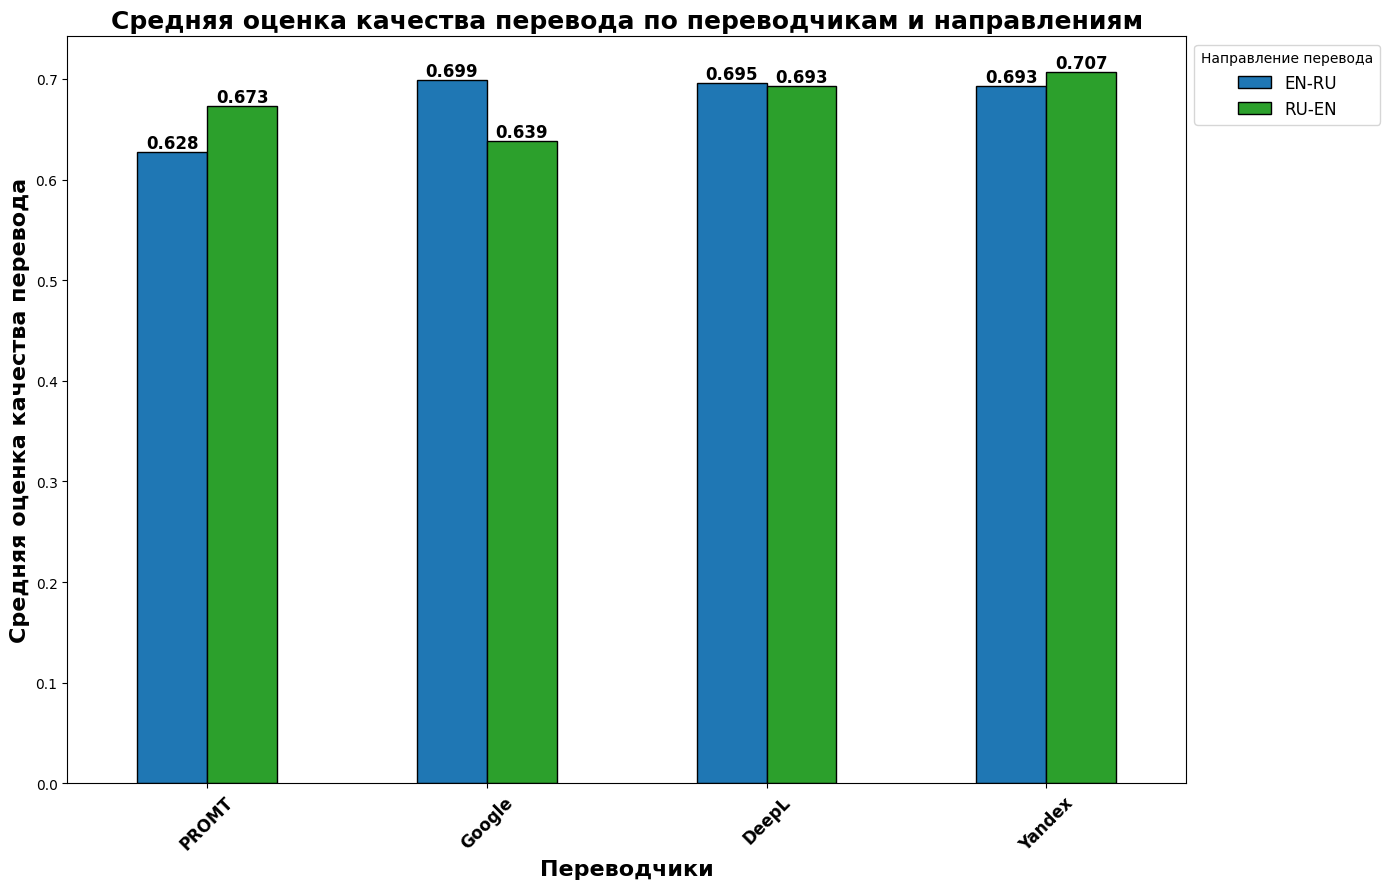


Средняя оценка качества перевода по переводчикам и направлениям:

PROMT: EN-RU = 0.628, RU-EN = 0.673
Google: EN-RU = 0.699, RU-EN = 0.639
DeepL: EN-RU = 0.695, RU-EN = 0.693
Yandex: EN-RU = 0.693, RU-EN = 0.707


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных из CSV
df = pd.read_csv("data.csv")

# Группируем по переводчикам и направлениям перевода, вычисляя средние оценки
translator_scores = df.groupby(['Переводчик', 'Направление перевода'])['Оценка качества перевода'].mean().unstack()

# Рассчитаем среднее по двум направлениям и отсортируем переводчиков по возрастанию
translator_scores['Среднее'] = translator_scores.mean(axis=1)
translator_scores = translator_scores.sort_values(by='Среднее').drop(columns=['Среднее'])

# Построение комбинированной столбчатой диаграммы с модной стилизацией
fig, ax = plt.subplots(figsize=(14, 9))
colors = ['#1f77b4', '#2ca02c']  # Зеленый и синий

bars = translator_scores.plot(kind='bar', ax=ax, color=colors, edgecolor='black')  # Обведение стенок столбиков

# Добавим значения над каждым столбцом
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, f"{height:.3f}", 
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')  # Увеличенные значения цифр

# Настройка графика
ax.set_xlabel('Переводчики', fontsize=16, fontweight='bold')
ax.set_ylabel('Средняя оценка качества перевода', fontsize=16, fontweight='bold')
ax.set_title('Средняя оценка качества перевода по переводчикам и направлениям', fontsize=18, fontweight='bold')
ax.set_xticklabels(translator_scores.index, rotation=45, fontsize=12, fontweight='bold')
ax.legend(title="Направление перевода", loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.tight_layout()
plt.show()

# Вывод текстовых данных под графиком
print("\nСредняя оценка качества перевода по переводчикам и направлениям:\n")
for translator in translator_scores.index:
    scores = translator_scores.loc[translator]
    print(f"{translator}: EN-RU = {scores['EN-RU']:.3f}, RU-EN = {scores['RU-EN']:.3f}")
